# &#x1F4D1; &nbsp; Scikit-Learn Cookbook
<h2 class="font-effect-ice">Code Library, Style and Links</h2>
  
<span>&#x1F310; &nbsp;</span> [DOMINO. Fitting Gaussian Process Models in Python](https://blog.dominodatalab.com/fitting-gaussian-process-models-python/)

<span>&#x1F310; &nbsp;</span> [Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

<span>&#x1F310; &nbsp;</span> [Principal Component Analysis in 3 Simple Steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

In [17]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;}  a {color: royalblue; font-family: 'Roboto';} 
h1, h2 {color: slategray; font-family: 'Ewert'; font-size:150%; text-shadow: 4px 4px 4px #aaa;} 
h3, h4 {color: darkslategray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
span {font-family:'Roboto'; color:black; text-shadow: 4px 4px 4px #aaa;}
div.output_area pre{font-family:'Roboto'; font-size:110%; color: royalblue;}    
</style>

In [28]:
style_dict = {'background-color':'gainsboro', 'color':'royalblue', 'border-color': 'white', 'font-family':'Roboto'}
import warnings; [warnings.filterwarnings('ignore', category=UserWarning) for el in [UserWarning,FutureWarning,DeprecationWarning]]
import numpy,pandas,seaborn,scipy,pylab,os,h5py; pylab.style.use('seaborn-whitegrid')

In [20]:
from sklearn import datasets,preprocessing,cluster,mixture,manifold,dummy,linear_model,svm
from sklearn.feature_extraction import DictVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.decomposition import PCA; from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

In [21]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression

from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import WhiteKernel, RationalQuadratic, RBF

from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPClassifier, BernoulliRBM, MLPRegressor

---
<h2 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Data</h2>

### internal datasets 
[Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html#datasets)

In [29]:
boston=datasets.load_boston(); housing=datasets.fetch_california_housing()
digits=datasets.load_digits(); wine=datasets.load_wine();
[X1,y1,X2,y2,X3,y3,X4,y4]=\
[boston.data,boston.target,housing.data,housing.target,digits.data,digits.target,wine.data,wine.target]

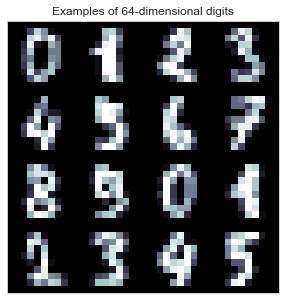

In [30]:
n=4; img=numpy.zeros((10*n,10*n))
for i in range(n): 
    for j in range(n): 
        img[(10*i+1):(10*i+9),(10*j+1):(10*j+9)]=X3[i*n+j].reshape((8,8))
pylab.figure(figsize=(5,5)); pylab.imshow(img,cmap=pylab.cm.bone)
pylab.title('Examples of 64-dimensional digits')
pylab.xticks([]); pylab.yticks([]); pylab.show()

### artificial datasets

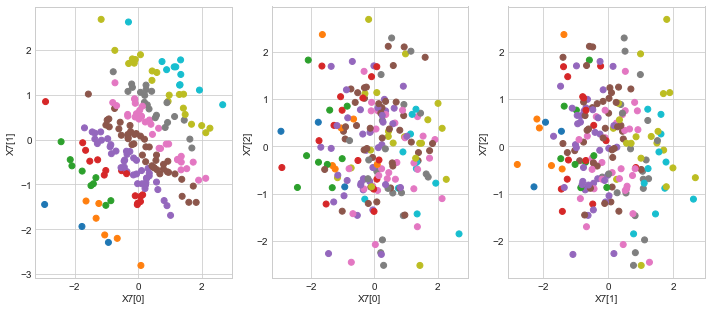

In [57]:
# 5000x3 matrix, 3 features (2 responsible for targets), 1 target, 0.97 - the bias factor
[X7,y7]=datasets.make_regression(5000,3,2,1,0.97)
f,ax=pylab.subplots(ncols=3,figsize=(12,5)); k=[[0,1],[0,2],[1,2]]
[ax[i].scatter(X7[:200,k[i][0]], X7[:200,k[i][1]],c=y7[:200],cmap=pylab.cm.tab10) for i in range(3)]
[ax[i].set_xlabel('X7[%d]'%k[i][0]) for i in range(3)]; [ax[i].set_ylabel('X7[%d]'%k[i][1]) for i in range(3)];

In [58]:
# 5000x10 matrix, 10 features (8 - responsible for targets), 2 targets, 0.7 - the bias factor, 10.0 - the noise
[X8,y8]=datasets.make_regression(5000,10,8,2,0.7,noise=10.0)

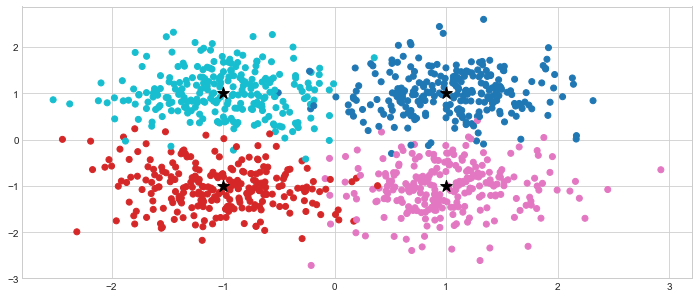

In [59]:
# Gaussian blobs for clustering, 1000 data points, 4 clusters
[X9,y9]=datasets.make_blobs(n_samples=1000,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],cluster_std=0.5)
pylab.figure(figsize=(12,5)); pylab.scatter(X9[:,0],X9[:,1],c=y9,cmap=pylab.cm.tab10)
pylab.scatter([1,-1,1,-1],[1,-1,-1,1],c='black',marker='*',s=150);

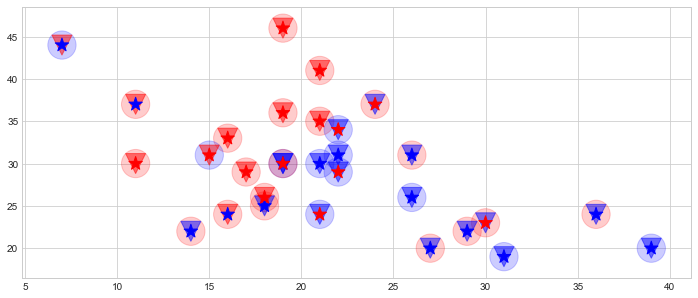

In [68]:
# 5000 data points, 2 features, 1 target with 3 labels
[X10,y10]=datasets.make_multilabel_classification(n_classes=3,n_samples=5000,n_features=2)
f,ax=pylab.subplots(1,figsize=(12,5)); m=['o','v','*']; a=[0.2,0.5,1]; s=[800,400,200]
[ax.scatter(X10[:30,0],X10[:30,1],c=y10[:30,i], marker=m[i],alpha=a[i],cmap=pylab.cm.bwr,s=s[i]) for i in range(3)];

### external datasets

In [82]:
# Classification. Handwritten letters
# Read the csv files
data1=pandas.read_csv("../deep_learning_projects/DL_PP2/data/letters.csv"); letters1=data1['letter']
data2=pandas.read_csv("../deep_learning_projects/DL_PP2/data2/letters2.csv"); letters2=data2['letter']
data3=pandas.read_csv("../deep_learning_projects/DL_PP2/data3/letters3.csv"); letters3=data3['letter']
# Concatenate series
letters=pandas.concat((letters1, letters2),axis=0,ignore_index=True)
letters=pandas.concat((letters, letters3),axis=0,ignore_index=True)
# Read the h5 file
#https://raw.githubusercontent.com/OlgaBelitskaya/large-repo/master/StyleColorImages.h5
#https://www.kaggle.com/olgabelitskaya/classification-of-handwritten-letters/downloads/LetterColorImages_123.h5
f=h5py.File('../large-repo/LetterColorImages_123.h5', 'r'); keys=list(f.keys())
# Create tensors and targets
backgrounds=numpy.array(f[keys[0]]); letter_images=numpy.array(f[keys[1]])/255; targets=numpy.array(f[keys[2]])

Label:  ж


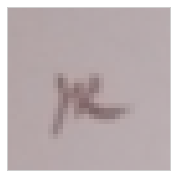

In [80]:
# Read and display an example
print('Label: ',letters[3000])
pylab.figure(figsize=(3,3)); pylab.xticks([]); pylab.yticks([]); pylab.imshow(letter_images[3000]);

In [77]:
# Classification. Brand & Products
# Read the h5 file
f = h5py.File('../large-repo/StyleColorImages.h5', 'r')
keys = list(f.keys())
# Create features and targets
brands = numpy.array(f[keys[0]]); style_images = numpy.array(f[keys[1]])/255; products = numpy.array(f[keys[2]])

Brand:  3 
Product: 2


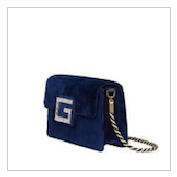

In [76]:
# Read and display an example
print('Brand: ', brands[1000], '\nProduct:', products[1000])
pylab.figure(figsize=(3,3)); pylab.xticks([]); pylab.yticks([])
pylab.imshow(style_images[1000]);

---
<h2 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Extraction and Preprocessing</h2>

### extraction

[[ 0  0  0  1  0  0 33]
 [ 0  0  1  0  0  0 16]
 [ 0  0  0  0  1  0 28]
 [ 0  0  0  0  0  1 38]
 [ 0  1  0  0  0  0 17]
 [ 1  0  0  0  0  0 27]]
['city=Ankara', 'city=Barcelona', 'city=Frankfurt', 'city=Hanoi', 'city=Houston', 'city=Riyadh', 'temperature']


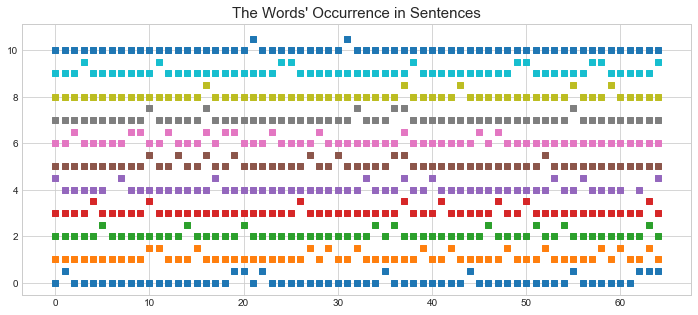

['have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'new', 'year']


In [88]:
# Basic examples
temperature=[{'city':'Hanoi','temperature':33.},{'city':'Frankfurt','temperature':16.},{'city':'Houston','temperature':28.},
             {'city':'Riyadh','temperature':38.},{'city':'Barcelona','temperature':17.},{'city':'Ankara','temperature':27.}]
corpus=['Have you already set your goals for the New Year?','Do you want to lose ten kilos, run a marathon or speak fluent English?', 
        'Some experts believe that you need systems, not goals.','A system is something you do on a regular basis.',
        'This means focusing on what you can control (your actions) rather than what you can’t.',
        'For example, do not focus on losing ten kilos.','Focus on shopping for healthy food and cooking something light every day.',
        'Do not focus on the marathon.','Focus on the training schedule.',
        'Invent a system to improve your English, one step at a time.','Good luck!']
dv=DictVectorizer(); temperature_features=dv.fit_transform(temperature).toarray().astype('int16')
print(temperature_features); print(dv.get_feature_names())
cv=CountVectorizer(min_df=1); corpus_features=cv.fit_transform(corpus)
corpus_array=corpus_features.toarray().astype('int16'); c_analyzer=cv.build_analyzer()
import pylab; pylab.figure(figsize=(12,5))
for i in range(len(corpus_array)): pylab.scatter(range(len(corpus_array[i])),(corpus_array[i]*0.5+i),marker='s')
pylab.title("The Words' Occurrence in Sentences",fontsize=15); pylab.show()
print(c_analyzer(corpus[0]))

### scaling

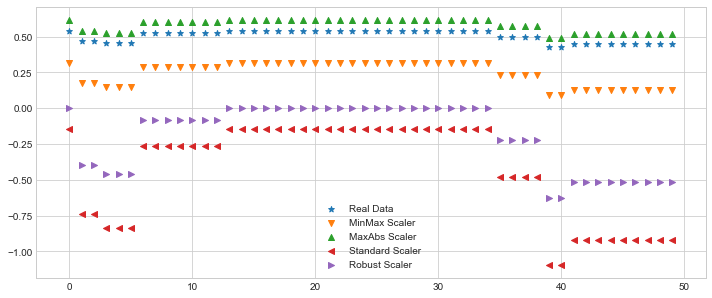

In [86]:
# Applying scalers
SCX1=[X1,preprocessing.MinMaxScaler().fit_transform(X1),preprocessing.MaxAbsScaler().fit_transform(X1),
      preprocessing.StandardScaler().fit_transform(X1),preprocessing.RobustScaler().fit_transform(X1)]
n=50; pylab.figure(figsize=(12,5)); m=['*','v','^','<','>']
labels=['Real Data','MinMax Scaler','MaxAbs Scaler','Standard Scaler','Robust Scaler']
for i in range(5): pylab.scatter(range(n),SCX1[i][:n,4],marker=m[i],label=labels[i])
pylab.legend(loc=8); pylab.show()

### one-hot encoding

In [96]:
# Encoding categorical variables 
def ohe(x): return preprocessing.OneHotEncoder().fit(x.reshape(-1,1)).transform(x.reshape(-1,1)).toarray().astype('int16')
cat_brands ,cat_products,cat_backgrounds,cat_targets=ohe(brands),ohe(products),ohe(backgrounds),ohe(targets)
print(targets[99:102],'=>',cat_targets[99:102])

[2 3 3] => [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### imputation of missing values

In [38]:
# Basic examples
x1_train = [[0, 17], [np.nan, 4], [1, 7], [3, np.nan], [10, 25]]
x1_test = [[np.nan, 5], [8, np.nan], [4, 6]]

# Mean
mean_imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer.fit(x1_train)
mean_imputer.transform(x1_test)

array([[ 3.5 ,  5.  ],
       [ 8.  , 13.25],
       [ 4.  ,  6.  ]])

In [39]:
# Median
median_imputer = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
median_imputer.fit(x1_train)
median_imputer.transform(x1_test)

array([[ 2.,  5.],
       [ 8., 12.],
       [ 4.,  6.]])

In [41]:
# Custom transformers
log_transformer = preprocessing.FunctionTransformer(np.log1p)
x1_log_train = log_transformer.transform(median_imputer.transform(x1_train))
x1_log_test = log_transformer.transform(median_imputer.transform(x1_test))
print(x1_log_train,'\n\n', x1_log_test)

[[0.         2.89037176]
 [1.09861229 1.60943791]
 [0.69314718 2.07944154]
 [1.38629436 2.56494936]
 [2.39789527 3.25809654]] 

 [[1.09861229 1.79175947]
 [2.19722458 2.56494936]
 [1.60943791 1.94591015]]


### features' importance

In [45]:
# Wine Dataset & Classifiers
df_importance = pd.DataFrame(columns=range(13))

df_importance.loc[0] = AdaBoostClassifier().fit(X4, y4).feature_importances_
df_importance.loc[1] = RandomForestClassifier().fit(X4, y4).feature_importances_
df_importance.loc[2] = GradientBoostingClassifier().fit(X4, y4).feature_importances_
df_importance.loc[3]= DecisionTreeClassifier().fit(X4, y4).feature_importances_
df_importance.loc[4] = ExtraTreeClassifier().fit(X4, y4).feature_importances_

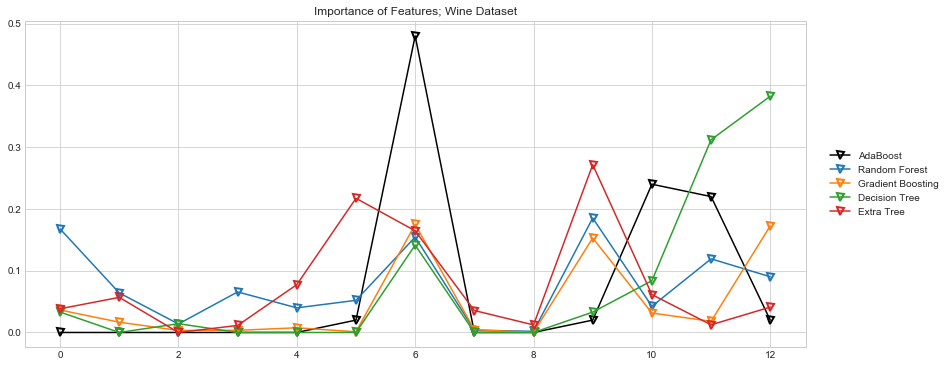

In [46]:
plt.figure(figsize = (14, 6))

plt.plot(df_importance.loc[0], '-v', color = 'black', label='AdaBoost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[1], '-v', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[2], '-v', label='Gradient Boosting',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[3], '-v', label='Decision Tree',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[4], '-v', label='Extra Tree',
        markersize=7, markerfacecolor="None", markeredgewidth=2)


plt.legend(loc=10, bbox_to_anchor=(1.1,0.5))
plt.title("Importance of Features; Wine Dataset");

### dimensionality reduction
Univariate Selection, Recursive Feature Elimination, Principal Component Analysis, etc.

In [48]:
# Univariate Selection; Wine Dataset
select_kbest = SelectKBest(score_func=chi2, k=4)
fit_select_kbest = select_kbest.fit(X4, y4)
features_select_kbest = fit_select_kbest.transform(X4)
np.set_printoptions(precision=4)
print(("Kbest scores: \n%a") % fit_select_kbest.scores_)
print(("Selected features: \n%a") % features_select_kbest[0:5,:])

Kbest scores: 
array([5.4455e+00, 2.8069e+01, 7.4338e-01, 2.9384e+01, 4.5026e+01,
       1.5623e+01, 6.3334e+01, 1.8155e+00, 9.3683e+00, 1.0902e+02,
       5.1825e+00, 2.3390e+01, 1.6540e+04])
Selected features: 
array([[ 127.  ,    3.06,    5.64, 1065.  ],
       [ 100.  ,    2.76,    4.38, 1050.  ],
       [ 101.  ,    3.24,    5.68, 1185.  ],
       [ 113.  ,    3.49,    7.8 , 1480.  ],
       [ 118.  ,    2.69,    4.32,  735.  ]])


In [51]:
# Recursive Feature Elimination; Wine Dataset
lr_model = linear_model.LogisticRegression()
rfe3 = RFE(lr_model, 3)
fit_rfe = rfe3.fit(X4, y4)
print(("Number of Features: %d") % fit_rfe.n_features_)
print(("Selected Features: \n%s") % fit_rfe.support_)
print(("Feature Ranking: \n%s") % fit_rfe.ranking_)

Number of Features: 3
Selected Features: 
[False False False False False False  True False False  True  True False
 False]
Feature Ranking: 
[ 9  5  2  4 10  8  1  7  6  1  1  3 11]


In [52]:
# Principal Component Analysis; Boston Dataset
pca3 = PCA(n_components=3)
fit_pca = pca3.fit(X1)

print(("Explained Variance: \n%s\n") % fit_pca.explained_variance_ratio_)
print(fit_pca.components_[0], '\n')
print(fit_pca.components_[1], '\n')
print(fit_pca.components_[2])

Explained Variance: 
[0.8058 0.1631 0.0213]

[ 2.9079e-02 -4.3590e-02  2.8331e-02 -5.5583e-05  4.4972e-04 -1.1682e-03
  8.3634e-02 -6.5617e-03  4.5006e-02  9.4975e-01  5.6002e-03 -2.9122e-01
  2.2943e-02] 

[ 5.9536e-03  1.1745e-03 -4.9488e-03 -1.0267e-04  1.8309e-06  3.6574e-04
 -5.7214e-03  3.5361e-04 -8.6182e-03 -2.9238e-01 -2.5289e-03 -9.5619e-01
  5.7670e-03] 

[-0.0116  0.6329 -0.0883 -0.001  -0.0018  0.0047 -0.7559  0.0451  0.0028
  0.0939 -0.0112 -0.0236 -0.0928]


### shuffling and splitting

In [106]:
def sas(X,y): return train_test_split(X,y,test_size=0.2,random_state=1)
Xy=[sas(X1,y1),sas(X2,y2),sas(X3,y3),sas(X4,y4)]
[[X_train1,X_test1,y_train1,y_test1],[X_train2,X_test2,y_train2,y_test2],
 [X_train3,X_test3,y_train3,y_test3],[X_train4,X_test4,y_train4,y_test4]]=Xy
print([[Xy[i][j].shape for j in range(4)] for i in range(4)]) # boston, housing , digits, wine

[[(404, 13), (102, 13), (404,), (102,)], [(16512, 8), (4128, 8), (16512,), (4128,)], [(1437, 64), (360, 64), (1437,), (360,)], [(142, 13), (36, 13), (142,), (36,)]]


In [108]:
Xy2=[sas(X7,y7),sas(X8,y8),sas(X9,y9),sas(X10,y10)]
[[X_train7,X_test7,y_train7,y_test7],[X_train8,X_test8,y_train8,y_test8],
 [X_train9,X_test9,y_train9,y_test9],[X_train10,X_test10,y_train10,y_test10]]=Xy2
print([[Xy2[i][j].shape for j in range(4)] for i in range(4)]) # toy datasets: regression, regression 2, blobs, classification

[[(4000, 3), (1000, 3), (4000,), (1000,)], [(4000, 10), (1000, 10), (4000, 2), (1000, 2)], [(800, 2), (200, 2), (800,), (200,)], [(4000, 2), (1000, 2), (4000, 3), (1000, 3)]]


In [109]:
Xy3=[sas(letter_images,targets),sas(letter_images,backgrounds),sas(style_images,brands),sas(style_images,products)]
[[X_train11,X_test11,y_train11,y_test11],[X_train12,X_test12,y_train12,y_test12],
 [X_train13,X_test13,y_train13,y_test13],[X_train14,X_test14,y_train14,y_test14]]=Xy3
print([[Xy3[i][j].shape for j in range(4)] for i in range(4)]) 
# handwritten letters and labels, handwritten letters and backgrounds, style images and brands, style images and products

[[(11352, 32, 32, 3), (2838, 32, 32, 3), (11352,), (2838,)], [(11352, 32, 32, 3), (2838, 32, 32, 3), (11352,), (2838,)], [(1747, 150, 150, 3), (437, 150, 150, 3), (1747,), (437,)], [(1747, 150, 150, 3), (437, 150, 150, 3), (1747,), (437,)]]


In [110]:
del letter_images,targets,backgrounds,style_images,brands,products

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Supervised Learning. Classification</h1>

In [32]:
classifier_list = []
classifier_names = []
clf_datasets = []

acc_train, acc_test = [], []
loss_train, loss_test = [], []

def classifier_fit_score(classifier, classifier_name, clf_dataset, x_train, x_test, y_train, y_test):
    classifier_list.append(str(classifier))
    classifier_names.append(str(classifier_name))
    clf_datasets.append(str(clf_dataset))
    
    clf = classifier
    clf.fit(x_train, y_train)
    
    y_clf_train = clf.predict(x_train)
    y_clf_test = clf.predict(x_test)
        
    acc_clf_train = round(accuracy_score(y_train, y_clf_train), 4)
    acc_train.append(acc_clf_train)
    acc_clf_test = round(accuracy_score(y_test, y_clf_test), 4)
    acc_test.append(acc_clf_test)
    
    loss_clf_train = round(hamming_loss(y_train, y_clf_train), 4)
    loss_train.append(loss_clf_train)
    loss_clf_test = round(hamming_loss(y_test, y_clf_test), 4)
    loss_test.append(loss_clf_test)
    
    return [y_clf_train, y_clf_test, acc_clf_train, acc_clf_test, loss_clf_train, loss_clf_test]

def get_classifier_results():
    df_results = pd.DataFrame({'classifier' : classifier_list,
                               'classifier_name': classifier_names,
                               'clf_dataset': clf_datasets,
                               'acc_train': acc_train, 'acc_test': acc_test,
                               'loss_train': loss_train, 'loss_test': loss_test})
               
    return df_results

df_list = ['classifier_name', 'acc_train', 'acc_test', 'loss_train', 'loss_test']

In [33]:
clf1 = linear_model.LogisticRegression()
clf2 = linear_model.LogisticRegressionCV() 
clf3 = linear_model.SGDClassifier()
clf4 = linear_model.RidgeClassifier()
clf5 = linear_model.RidgeClassifierCV()
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()
clf8 = svm.LinearSVC()
clf9 = svm.SVC(C=10.0, kernel='poly')
clf10 = svm.NuSVC(kernel='poly')
clf11 = KNeighborsClassifier()
clf12 = RadiusNeighborsClassifier(radius=30)
clf13 = NearestCentroid()
clf14 = DecisionTreeClassifier()
clf15 = ExtraTreeClassifier()
clf16 = GaussianNB()
clf17 = BernoulliNB()
clf18 = MultinomialNB()
clf19 = BaggingClassifier()
clf20 = RandomForestClassifier()
clf21 = AdaBoostClassifier()
clf22 = GradientBoostingClassifier()
clf23 = linear_model.Perceptron()
clf24 = linear_model.PassiveAggressiveClassifier()
clf25 = GaussianProcessClassifier()
clf26 = LabelPropagation()
clf27 = LabelSpreading()

In [34]:
y_train31, y_test31 = \
classifier_fit_score(clf1, 'LogisticRegression', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train32, y_test32 = \
classifier_fit_score(clf2, 'LogisticRegressionCV', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train33, y_test33 = \
classifier_fit_score(clf3, 'SGDClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train34, y_test34 = \
classifier_fit_score(clf4, 'RidgeClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train35, y_test35 = \
classifier_fit_score(clf5, 'RidgeClassifierCV', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train36, y_test36 = \
classifier_fit_score(clf6, 'LinearDiscriminantAnalysis', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train37, y_test37 = \
classifier_fit_score(clf7, 'QuadraticDiscriminantAnalysis', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train38, y_test38 = \
classifier_fit_score(clf8, 'LinearSVC', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train39, y_test39 = \
classifier_fit_score(clf9, 'SVC', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train310, y_test310 = \
classifier_fit_score(clf10, 'NuSVC', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]

In [35]:
y_train311, y_test311 = \
classifier_fit_score(clf11, 'KNeighborsClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train312, y_test312 = \
classifier_fit_score(clf12, 'RadiusNeighborsClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train313, y_test313 = \
classifier_fit_score(clf13, 'NearestCentroid', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train314, y_test314 = \
classifier_fit_score(clf14, 'DecisionTreeClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train315, y_test315 = \
classifier_fit_score(clf15, 'ExtraTreeClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train316, y_test316 = \
classifier_fit_score(clf16, 'GaussianNB', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train317, y_test317 = \
classifier_fit_score(clf17, 'BernoulliNB', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train318, y_test318 = \
classifier_fit_score(clf18, 'MultinomialNB', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train319, y_test319 = \
classifier_fit_score(clf19, 'BaggingClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train320, y_test320 = \
classifier_fit_score(clf20, 'RandomForestClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train321, y_test321 = \
classifier_fit_score(clf21, 'AdaBoostClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train322, y_test322 = \
classifier_fit_score(clf22, 'GradientBoostingClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train323, y_test323 = \
classifier_fit_score(clf23, 'Perceptron', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train324, y_test324 = \
classifier_fit_score(clf24, 'PassiveAggressiveClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]

In [36]:
y_train725, y_test725 = \
classifier_fit_score(clf25, 'GaussianProcessClassifier', 'Toy Blobs',X_train7, X_test7, y_train7, y_test7)[:2]
y_train726, y_test726 = \
classifier_fit_score(clf26, 'LabelPropagation', 'Toy Blobs',X_train7, X_test7, y_train7, y_test7)[:2]
y_train727, y_test727 = \
classifier_fit_score(clf27, 'LabelSpreading', 'Toy Blobs', X_train7, X_test7, y_train7, y_test7)[:2]

In [37]:
y_train911, y_test911 = \
classifier_fit_score(clf11, 'KNeighborsClassifier', 'Handwritten Letters',
                     X_train9.reshape(-1,32*32*3), X_test9.reshape(-1,32*32*3), y_train9, y_test9)[:2]
y_train919, y_test919 = \
classifier_fit_score(clf19, 'BaggingClassifier', 'Handwritten Letters',
                     X_train9.reshape(-1,32*32*3), X_test9.reshape(-1,32*32*3), y_train9, y_test9)[:2]
y_train920, y_test920 = \
classifier_fit_score(clf20, 'RandomForestClassifier', 'Handwritten Letters',
                     X_train9.reshape(-1,32*32*3), X_test9.reshape(-1,32*32*3), y_train9, y_test9)[:2]
y_train922, y_test922 = \
classifier_fit_score(clf22, 'GradientBoostingClassifier', 'Handwritten Letters',
                     X_train9.reshape(-1,32*32*3), X_test9.reshape(-1,32*32*3), y_train9, y_test9)[:2]

In [38]:
df_classifier_results  = get_classifier_results()

In [39]:
# Digits
df_classifier_results[df_list][:24].sort_values('acc_test', ascending=False)\
.style.set_properties(**style_dict)

,classifier_name,acc_train,acc_test,loss_train,loss_test
10,KNeighborsClassifier,0.9882,0.9944,0.0118,0.0056
11,RadiusNeighborsClassifier,0.9763,0.9944,0.0237,0.0056
8,SVC,1,0.9861,0,0.0139
1,LogisticRegressionCV,0.9903,0.975,0.0097,0.025
0,LogisticRegression,0.9965,0.9694,0.0035,0.0306
9,NuSVC,0.9631,0.9639,0.0369,0.0361
5,LinearDiscriminantAnalysis,0.9659,0.9611,0.0341,0.0389
2,SGDClassifier,0.961,0.9556,0.039,0.0444
21,GradientBoostingClassifier,1,0.9556,0,0.0444
19,RandomForestClassifier,1,0.9556,0,0.0444


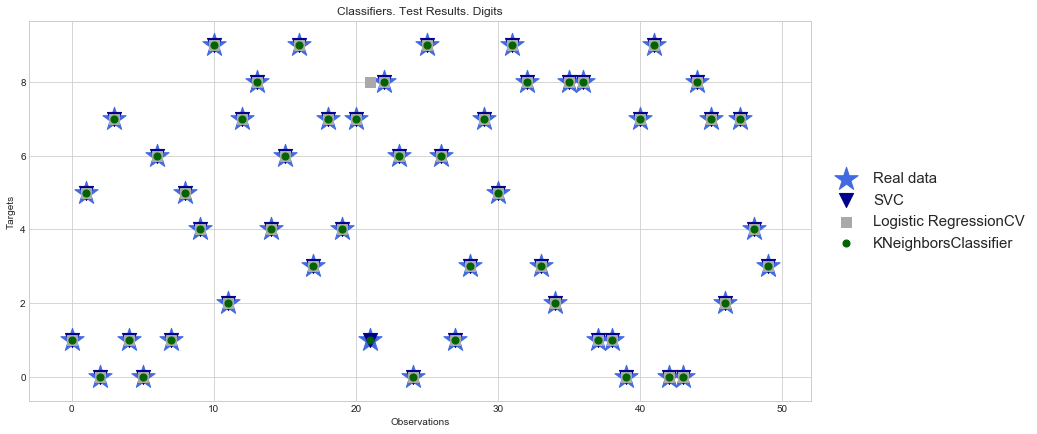

In [40]:
plt.figure(figsize=(14, 7))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=600, color='royalblue', label='Real data')

plt.scatter(x, y_test39[:n], marker='v', s=200, color='darkblue', label='SVC')
plt.scatter(x, y_test32[:n], marker='s', s=100, color='darkgrey', label='Logistic RegressionCV')
plt.scatter(x, y_test311[:n], marker='o', s=50, color='darkgreen', label='KNeighborsClassifier')

plt.xlabel('Observations')
plt.ylabel('Targets')
plt.title('Classifiers. Test Results. Digits')
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5), fontsize=15);

In [41]:
# Toy blobs
df_classifier_results[df_list][24:27].sort_values('acc_test', ascending=False)\
.style.set_properties(**style_dict)

,classifier_name,acc_train,acc_test,loss_train,loss_test
24,GaussianProcessClassifier,0.9725,0.94,0.0275,0.06
25,LabelPropagation,0.9762,0.935,0.0238,0.065
26,LabelSpreading,0.9762,0.935,0.0238,0.065


In [42]:
#  Handwritten letters
df_classifier_results[df_list][27:].sort_values('acc_test', ascending=False)\
.style.set_properties(**style_dict)

,classifier_name,acc_train,acc_test,loss_train,loss_test
30,GradientBoostingClassifier,0.876,0.3034,0.124,0.6966
27,KNeighborsClassifier,0.5608,0.2925,0.4392,0.7075
28,BaggingClassifier,0.9968,0.2491,0.0032,0.7509
29,RandomForestClassifier,0.9969,0.2301,0.0031,0.7699


In [43]:
df_classifier_results.to_csv('classifier_results.csv')

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Supervised Learning. Regression</h1>

In [53]:
regressor_list = []
regressor_names = []
reg_datasets = []
r2_train, r2_test = [], []
ev_train, ev_test = [], []
mse_train, mse_test = [], []
mae_train, mae_test = [], []
mdae_train, mdae_test = [], []

def regressor_fit_score(regressor, regressor_name, dataset, x_train, x_test, y_train, y_test):
    regressor_list.append(str(regressor))
    regressor_names.append(str(regressor_name))
    reg_datasets.append(str(dataset))
    
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_reg_train = reg.predict(x_train)
    y_reg_test = reg.predict(x_test)
    
    r2_reg_train = round(r2_score(y_train, y_reg_train), 4)
    r2_train.append(r2_reg_train)
    r2_reg_test = round(r2_score(y_test, y_reg_test), 4)
    r2_test.append(r2_reg_test)
    
    ev_reg_train = round(explained_variance_score(y_train, y_reg_train), 4)
    ev_train.append(ev_reg_train)
    ev_reg_test = round(explained_variance_score(y_test, y_reg_test), 4)
    ev_test.append(ev_reg_test)
    
    mse_reg_train = round(mean_squared_error(y_train, y_reg_train), 4)
    mse_train.append(mse_reg_train)
    mse_reg_test = round(mean_squared_error(y_test, y_reg_test), 4)
    mse_test.append(mse_reg_test)
    
    mae_reg_train = round(mean_absolute_error(y_train, y_reg_train), 4)
    mae_train.append(mae_reg_train)
    mae_reg_test = round(mean_absolute_error(y_test, y_reg_test), 4)
    mae_test.append(mae_reg_test)
    
    mdae_reg_train = round(median_absolute_error(y_train, y_reg_train), 4)
    mdae_train.append(mdae_reg_train)
    mdae_reg_test = round(median_absolute_error(y_test, y_reg_test), 4)
    mdae_test.append(mdae_reg_test)
    
    return [y_reg_train, y_reg_test, mdae_reg_train, mdae_reg_test,
            r2_reg_train, r2_reg_test, ev_reg_train, ev_reg_test,
            mse_reg_train, mse_reg_test, mae_reg_train, mae_reg_test]

def get_regressor_results():
    df_results = pd.DataFrame({'regressor' : regressor_list,
                               'regressor_name': regressor_names,
                               'dataset': reg_datasets,
                               'r2_train': r2_train, 'r2_test': r2_test,
                               'ev_train': ev_train, 'ev_test': ev_test,
                               'mse_train': mse_train, 'mse_test': mse_test,
                               'mae_train': mae_train, 'mae_test': mae_test,
                               'mdae_train': mdae_train, 'mdae_test': mdae_test})
               
    return df_results

df_list2 = ['regressor_name', 'r2_train', 'r2_test', 
            'ev_train', 'ev_test', 'mse_train', 'mse_test', 
            'mae_train', 'mae_test', 'mdae_train', 'mdae_test']

In [54]:
reg1 = linear_model.LinearRegression()
reg2 = linear_model.Ridge()
reg3 = linear_model.RidgeCV()
reg4 = linear_model.Lasso()
reg5 = linear_model.LassoLarsCV()
reg6 = linear_model.RANSACRegressor()
reg7 = linear_model.BayesianRidge()
reg8 = linear_model.ARDRegression()
reg9 = linear_model.HuberRegressor()
reg10 = linear_model.TheilSenRegressor()
reg11 = PLSRegression()
reg12 = DecisionTreeRegressor()
reg13 = ExtraTreeRegressor()
reg14 = BaggingRegressor()
reg15 = AdaBoostRegressor()
reg16 = GradientBoostingRegressor()
reg17 = RandomForestRegressor()

reg18 = linear_model.PassiveAggressiveRegressor()
reg19 = linear_model.ElasticNet()
reg20 = linear_model.SGDRegressor()
reg21 = svm.SVR()
reg22 = KNeighborsRegressor()
reg23 = RadiusNeighborsRegressor(radius=1.5)
reg24 = GaussianProcessRegressor()

In [55]:
y_train11, y_test11 = \
regressor_fit_score(reg1, 'LinearRegression', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train12, y_test12 = \
regressor_fit_score(reg2, 'Ridge', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train13, y_test13 = \
regressor_fit_score(reg3, 'RidgeCV', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train14, y_test14 = \
regressor_fit_score(reg4, 'Lasso', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train15, y_test15 = \
regressor_fit_score(reg5, 'LassoLarsCV', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train16, y_test16 = \
regressor_fit_score(reg6, 'RANSACRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train17, y_test17 = \
regressor_fit_score(reg7, 'BayesianRidge', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train18, y_test18 = \
regressor_fit_score(reg8, 'ARDRegression', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train19, y_test19 = \
regressor_fit_score(reg9, 'HuberRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train110, y_test110 = \
regressor_fit_score(reg10, 'TheilSenRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train111, y_test111 = \
regressor_fit_score(reg11, 'PLSRegression', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train112, y_test112 = \
regressor_fit_score(reg12, 'DecisionTreeRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train113, y_test113 = \
regressor_fit_score(reg13, 'ExtraTreeRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train114, y_test114 = \
regressor_fit_score(reg14, 'BaggingRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train115, y_test115 = \
regressor_fit_score(reg15, 'AdaBoostRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train116, y_test116 = \
regressor_fit_score(reg16, 'GradientBoostingRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]
y_train117, y_test117 = \
regressor_fit_score(reg17, 'RandomForestRegressor', 'Boston', X_train1, X_test1, y_train1, y_test1)[:2]

In [56]:
y_train518, y_test518 = \
regressor_fit_score(reg18, 'PassiveAggressiveRegressor', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]
y_train519, y_test519 = \
regressor_fit_score(reg19, 'ElasticNet', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]
y_train520, y_test520 = \
regressor_fit_score(reg20, 'SGDRegressor', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]
y_train521, y_test521 = \
regressor_fit_score(reg21, 'SVR', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]
y_train522, y_test522 = \
regressor_fit_score(reg22, 'KNeighborsRegressor', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]
y_train523, y_test523 = \
regressor_fit_score(reg23, 'RadiusNeighborsRegressor', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]
y_train524, y_test524 = \
regressor_fit_score(reg24, 'GaussianProcessRegressor', 'Toy Regression', X_train5, X_test5, y_train5, y_test5)[:2]

In [57]:
df_regressor_results  = get_regressor_results()

In [58]:
# Boston
df_regressor_results[df_list2][:17].sort_values('r2_test', ascending=False)\
.style.set_properties(**style_dict)

,regressor_name,r2_train,r2_test,ev_train,ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test
15,GradientBoostingRegressor,0.978,0.9223,0.978,0.9225,1.775,7.6756,1.0375,2.141,0.8262,1.7101
13,BaggingRegressor,0.9715,0.9159,0.9715,0.9166,2.3029,8.3105,0.958,2.3885,0.62,2.12
16,RandomForestRegressor,0.9737,0.8977,0.9737,0.8983,2.1252,10.1101,0.9257,2.5195,0.605,2.09
14,AdaBoostRegressor,0.9058,0.8504,0.9087,0.858,7.6111,14.7812,2.2979,3.0815,2.1005,2.9732
11,DecisionTreeRegressor,1,0.8093,1,0.8104,0,18.8458,0,3.0578,0,1.85
12,ExtraTreeRegressor,1,0.7987,1,0.8024,0,19.8931,0,3.1824,0,1.8
1,Ridge,0.7264,0.7657,0.7264,0.7664,22.1045,23.1593,3.1861,3.7101,2.3151,3.2462
2,RidgeCV,0.7292,0.7642,0.7292,0.7649,21.8746,23.3003,3.1897,3.7389,2.3831,3.1336
0,LinearRegression,0.7293,0.7635,0.7293,0.7641,21.868,23.3746,3.1984,3.7491,2.39,3.1127
4,LassoLarsCV,0.729,0.7628,0.729,0.7636,21.8904,23.4385,3.1861,3.7466,2.3413,3.0463


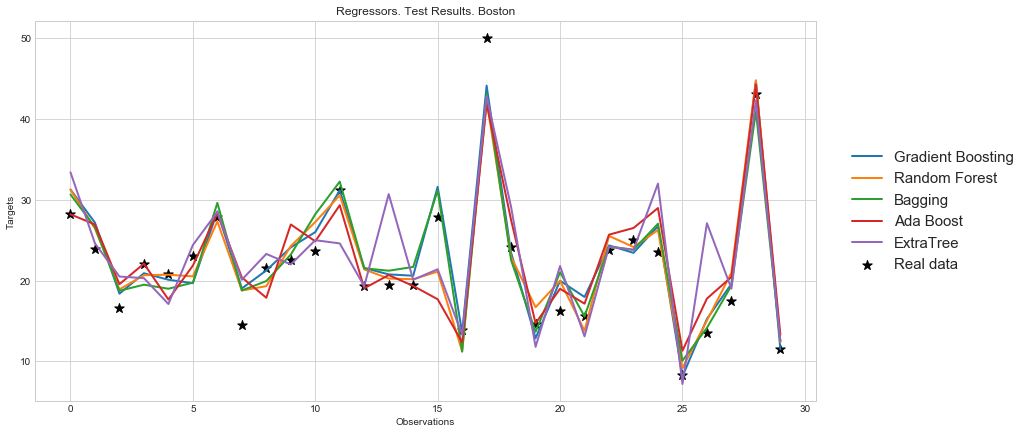

In [59]:
plt.figure(figsize=(14,7))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_test116[:n], lw=2, label='Gradient Boosting')
plt.plot(x, y_test117[:n], lw=2, label='Random Forest')
plt.plot(x, y_test114[:n], lw=2, label='Bagging')
plt.plot(x, y_test115[:n], lw=2, label='Ada Boost')
plt.plot(x, y_test113[:n], lw=2, label='ExtraTree')

plt.xlabel('Observations')
plt.ylabel('Targets')
plt.title('Regressors. Test Results. Boston')
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5), fontsize=15);

In [60]:
# Toy regression
df_regressor_results[df_list2][17:].sort_values('r2_test', ascending=False)\
.style.set_properties(**style_dict)

,regressor_name,r2_train,r2_test,ev_train,ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test
17,PassiveAggressiveRegressor,1,1,1,1,0.0008,0.0008,0.0224,0.0222,0.0196,0.0184
19,SGDRegressor,1,1,1,1,0.0001,0.0001,0.0071,0.0071,0.006,0.006
23,GaussianProcessRegressor,1,1,1,1,0,0.0761,0,0.0249,0,0
21,KNeighborsRegressor,0.9948,0.9927,0.9948,0.9927,39.7975,53.7373,4.0494,4.8372,2.816,3.4727
20,SVR,0.9118,0.9081,0.9118,0.9081,669.423,680.208,9.7392,9.2793,0.82,0.82
22,RadiusNeighborsRegressor,0.8925,0.8911,0.8925,0.8913,816.472,805.585,23.4165,23.4683,20.71,21.1763
18,ElasticNet,0.8864,0.8863,0.8864,0.8863,862.238,841.55,23.4042,23.3113,19.8668,20.0501


In [61]:
df_regressor_results.to_csv('regressor_results.csv')

### combining regression with kernels

In [191]:
# Toy regression 2
reg25 = KernelRidge()
reg25.fit(X_train6, y_train6)
    
y_train625 = reg25.predict(X_train6)
y_test625 = reg25.predict(X_test6)

reg25.score(X_test6, y_test6)

0.9965616117275927

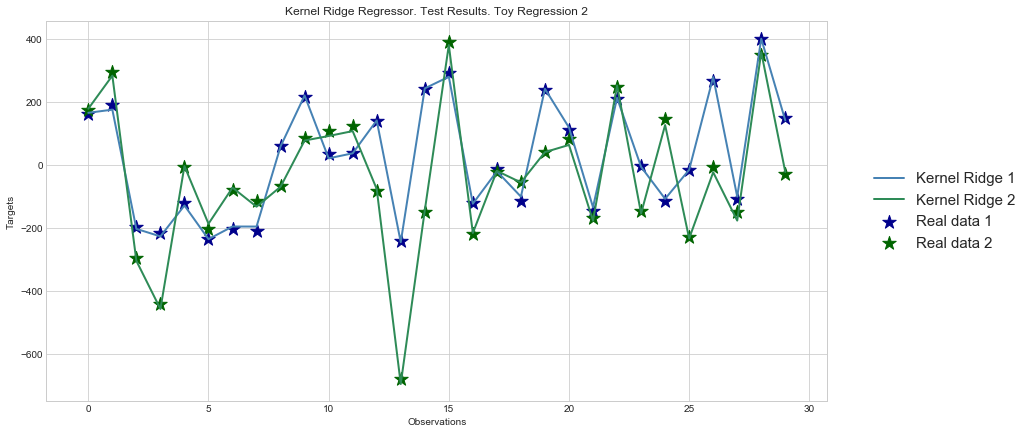

In [192]:
plt.figure(figsize=(14,7))
n=30
x=range(n)

plt.scatter(x, y_test6[:n, 0], marker='*', s=200, color='darkblue', label='Real data 1')
plt.scatter(x, y_test6[:n, 1], marker='*', s=200, color='darkgreen', label='Real data 2')

plt.plot(x, y_test625[:n, 0], lw=2, color='steelblue', label='Kernel Ridge 1')
plt.plot(x, y_test625[:n, 1], lw=2, color='seagreen', label='Kernel Ridge 2')

plt.xlabel('Observations')
plt.ylabel('Targets')
plt.title('Kernel Ridge Regressor. Test Results. Toy Regression 2')
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5), fontsize=15);

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Unsupervised learning</h1>

In [200]:
usl1 = mixture.GaussianMixture(n_components=4, n_init=4)
usl2 = mixture.BayesianGaussianMixture(n_components=4, n_init=4)
usl3 = manifold.Isomap()
usl4 = manifold.LocallyLinearEmbedding()
usl5 = manifold.SpectralEmbedding()
usl6 = manifold.MDS()
usl7 = manifold.TSNE()

In [201]:
# Toy blobs
usl1.fit(X_train7, y_train7)
y_test71 = usl1.predict(X_test7)
usl2.fit(X_train7, y_train7)
y_test72 = usl2.predict(X_test7)

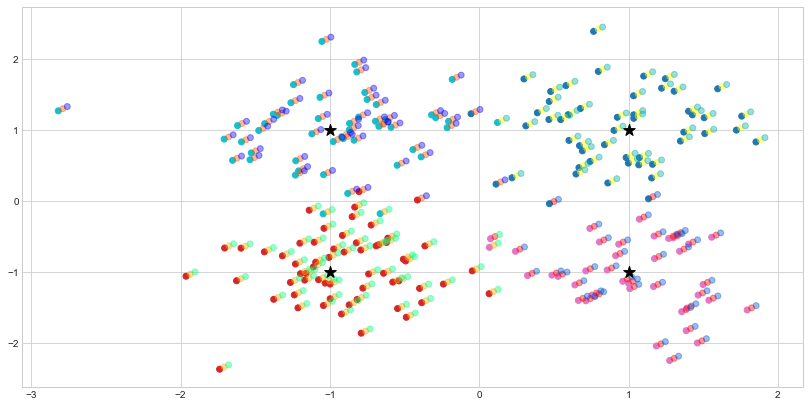

In [203]:
plt.figure(figsize=(14,7))
plt.scatter(X_test7[:, 0], X_test7[:, 1], c=y_test7, cmap=plt.cm.tab10)

plt.scatter(X_test7[:, 0]+0.03, X_test7[:, 1]+0.03, c=y_test71, 
            alpha=0.4, cmap=plt.cm.autumn)
plt.scatter(X_test7[:, 0]+0.06, X_test7[:, 1]+0.06, c=y_test72, 
            alpha=0.4, cmap=plt.cm.winter)

plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Neural Networks</h1>

### supervised

In [33]:
# Multi-layer Perceptron; Classifier; Digits
nn_clf1 = MLPClassifier(hidden_layer_sizes=(512,), max_iter=70, solver='sgd',
                        verbose=0, random_state=1, learning_rate_init=.01)
nn_clf1.fit(X_train3, y_train3)

nn_clf1.score(X_train3, y_train3),  nn_clf1.score(X_test3, y_test3)

(1.0, 0.9888888888888889)

In [62]:
# Multi-layer Perceptron; Classifier; Handwritten letters
nn_clf2 = MLPClassifier(hidden_layer_sizes=(1024,), max_iter=50, solver='sgd',
                        verbose=0, random_state=1, learning_rate_init=.01)
nn_clf2.fit(X_train9.reshape(-1,32*32*3), y_train9)

nn_clf2.score(X_train9.reshape(-1,32*32*3), y_train9),  nn_clf2.score(X_test9.reshape(-1,32*32*3), y_test9)

(0.3642529950669486, 0.32945736434108525)

In [36]:
# Multi-layer Perceptron; Regressor; Boston
nn_reg1 = MLPRegressor(hidden_layer_sizes=(104,), max_iter=1000, solver='lbfgs', alpha=0.015)
nn_reg1.fit(X_train1, y_train1)

y_test1_nn1 = nn_reg1.predict(X_test1)
nn_reg1.score(X_train1, y_train1), nn_reg1.score(X_test1, y_test1)

(0.8637565783640968, 0.8429784171703395)

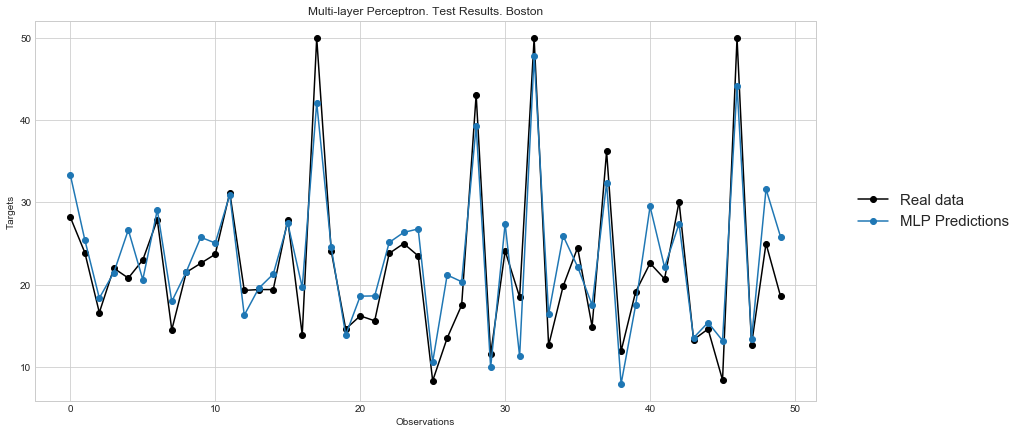

In [162]:
plt.figure(figsize=(14,7))
n=50
x=range(n)

plt.plot(x, y_test1[:n], '-o', color='black', label='Real data')

plt.plot(x, y_test1_nn1[:n], '-o', label='MLP Predictions')

plt.xlabel('Observations')
plt.ylabel('Targets')
plt.title('Multi-layer Perceptron. Test Results. Boston')
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5), fontsize=15);

### unsupervised

In [149]:
# Restricted Boltzmann machines; Digits
X_train3_scaled = (X_train3 - np.min(X_train3, 0)) / (np.max(X_train3, 0) + 0.0001)
X_test3_scaled = (X_test3 - np.min(X_test3, 0)) / (np.max(X_test3, 0) + 0.0001)

logistic = linear_model.LogisticRegression(max_iter=50)
logistic.C = 5000.0

brbm = BernoulliRBM(random_state=0, verbose=False)
brbm.learning_rate, brbm.n_iter, brbm.n_components = 0.05, 50, 64

nn_clf2 = Pipeline(steps=[('brbm', brbm), ('logistic', logistic)])
nn_clf2.fit(X_train3_scaled, y_train3)

Pipeline(memory=None,
     steps=[('brbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=64, n_iter=50,
       random_state=0, verbose=False)), ('logistic', LogisticRegression(C=5000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [150]:
print("Logistic regression using BRBM features:\n%s\n" % \
      (classification_report(y_test3, nn_clf2.predict(X_test3_scaled))))

Logistic regression using BRBM features:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.97      0.94      0.96        35
          2       0.97      0.97      0.97        36
          3       0.95      1.00      0.98        41
          4       0.95      0.97      0.96        38
          5       0.94      0.97      0.95        30
          6       1.00      1.00      1.00        37
          7       0.94      0.89      0.92        37
          8       0.93      0.90      0.91        29
          9       0.94      0.97      0.96        34

avg / total       0.96      0.96      0.96       360


